Seaborn tutorial: https://seaborn.pydata.org/tutorial/function_overview.html
ibm cloud link: https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/e3266699-bcad-4a2f-a6e0-1b6e1bc25e50?projectid=10a95276-b540-4598-8c52-7be3109421fd&context=cpdaas

## The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [1]:
import os 
import scipy as scipy
import sklearn as sklearn 
import numpy as np 
import statsmodels as sm 
import pandas as pd 
import seaborn as sns 

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
bstndf = pd.read_csv(boston_url)

In [3]:
bstndf

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## Task 4.1  Boxplot for "Median value of owner-occupied homes" 

### Findings: 

- the following plot shows that the median of MEDV is around 22 and the range is almost $5-40K$. 
- There are some outliers which have higher values upto $50K. 

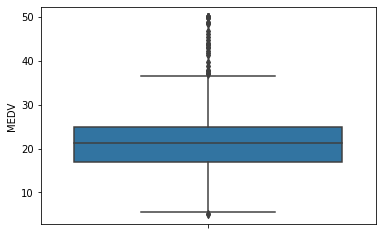

In [4]:
sns.boxplot(y=bstndf['MEDV'] )
#sns.distplot(bstndf['MEDV'])

## 4.2 Provide  a  histogram for the Charles river variable
### Findings: 
* Conclusion :Most of the houses are not near the Charles river.

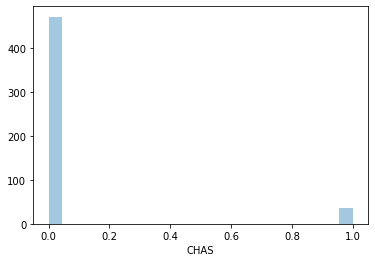

In [5]:
## this still does not work so working with distplot 
##sns.histplot(data=bstndf, x='CHAS') 

sns.distplot(bstndf.CHAS, kde=False) 




## 4.2 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

### Findings: 

- We can conclude following from the box plot for three age categories: 
1. as the age increases the MEDV decreases. 
2. with increase age, say last bin, the outlier increases. 
3. Young generation has more money to spend on the house? Or prefer to spend more money on the house? 
  *  This can be somewhat expected, and might be related to the age factor, family member/dependents in the age 35-70 and no job after 70 etc. 


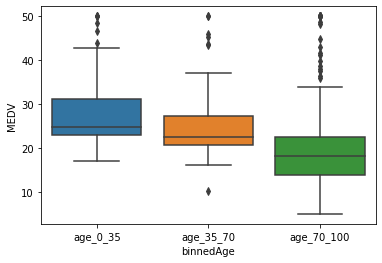

In [6]:
bstndf['binnedAge'] = pd.cut(x=bstndf.AGE, bins=[0,35,70,1000],labels=['age_0_35','age_35_70','age_70_100'])
sns.boxplot(y=bstndf.MEDV, x=bstndf.binnedAge)


## 4.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

### Finding 
- We can conclude following from the scatter plot for nitric oxide concentrations and the proportion of non-retail buisness acres per town: 
1.  correlation is positive

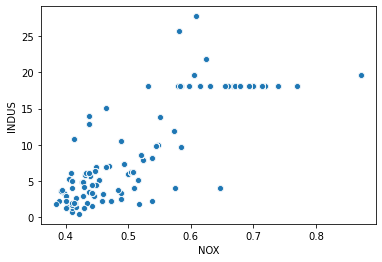

In [7]:
sns.scatterplot(bstndf.NOX, bstndf.INDUS)

## 4.5  Create a histogram for the pupil to teacher ratio variable
### Findings: 
-We conclude that in the pupil to teacher ratio is high and mode is near 20.


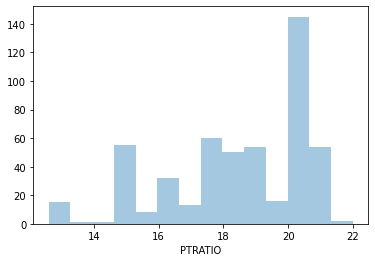

In [8]:
sns.distplot(bstndf.PTRATIO,kde=False)

In [9]:
#sns.jointplot(bstndf.NOX, bstndf.INDUS)
#sns.jointplot(data=bstndf, x='NOX', y='INDUS', hue='binnedAge')

In [10]:
import statsmodels as sm 
import pandas as pd 
import numpy as np 
import scipy.stats as stats

## 5.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- There are two variables at hand, MEDV and CHAS. 
  1. MEDV: continuous variable 
  2. CHAS: categorial variable 
- Aim: To check if there is significant difference in the MEDV bounded by the Charles river or not.  
  * In order to do this I define the hypothesis as follow: 
- Hypotheses 
  1. $H_0$: the mean of MEDV for two cases are equal, i.e. $\mu_{C-bounded}$ = $\mu_{C-non-bounded}$;
     * where, C-bounded: CHAS=1
     * C-non-bounded: CHAS=0
  2. $H_1$: the means are not equal. 
- $\alpha$ = 0.05 
- The nature of variables suggests to perform the t-test. 
- Conclusion:
    * Levene test output: as the output of levene is 0.0033, i.e. rejects the NULL hypothesis i.e the variance of both the sample are not equal so for the ttest we will use the variable equal_var = False
    * t-test :  As the pvalue is less the 0.05 so we rejects the NULL hypothesis i.e. there is a significant difference in median value of houses bounded by the Charles river or not. 
  



In [11]:
Cnonbounded = bstndf[(bstndf["CHAS"] ==0)]["MEDV"]
Cbounded = bstndf[(bstndf["CHAS"] ==1)]["MEDV"]

print ("Levene test result: ",stats.levene(Cnonbounded,Cbounded, center = "mean"))
print ("t-test result: ",stats.ttest_ind(Cnonbounded,Cbounded,equal_var = False))

Levene test result:  LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)
t-test result:  Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)


## 5.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- There are two variables at hand, MEDV and AGE. 
  1. MEDV: continuous variable
  2. AGE : continous variable but we can divide it into three groups i.e  bins=[0,35,70,1000]) 
- Aim: To check if there is significant difference in the MEDV and AGE.  
  * In order to do this I define the hypothesis as follow: 
- Hypotheses 
  1. $H_0$: the mean of MEDV for three cases are equal, i.e. $\mu_{0to35}$ = $\mu_{35to70}$ =$\mu_{70to100}$ ;
     * where,0to35 is the proportion of owner occupied units built prior to 1940 with age from 0 to 35
     and similar for 35to70 and 70to100
  2. $H_1$: one of the mean are not equal. 
- $\alpha$ = 0.05 
- The nature of variables suggests to perform the ANOVA. 
- Conclusion:
    * The p-value as a outcome of the F-test is <0.05 hence there are sufficient evidence from data that at least two out of the the three categories based on the AGE have different MEDV. 



In [12]:
#bstndf['binnedAge'] = pd.cut(x=bstndf.AGE, bins=[0,35,70,1000])


age0to35 =bstndf[bstndf['binnedAge'] == 'age_0_35']["MEDV"]
age35to70 = bstndf[bstndf['binnedAge'] == 'age_35_70']["MEDV"]
age70to100 =bstndf[bstndf['binnedAge'] == 'age_70_100']["MEDV"]

f_statistics,pvalue = stats.f_oneway(age0to35,age35to70,age70to100)
print(f_statistics,pvalue)


36.40764999196599 1.7105011022702984e-15


## 5.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- There are two variables at hand, MEDV and AGE. 
  1. NOX: continuous variable
  2. INDUS : continous variable  
- Aim: To check if there is significant difference in the NOX and INDUS.  
  * In order to do this I define the hypothesis as follow: 
- Hypotheses 
  1. $H_0$: there is no relationship b/w the nitric oxide conc and prop. of non-retail business acres per town, i.e.      
  2. $H_1$: there is  relationship b/w the nitric oxide conc and prop. of non-retail business acres per town. 
- $\alpha$ = 0.05 
- The nature of variables suggests to perform the Pearson Correlation. This will give the correlation coefficient b/w the two variables.  
- Conclusion:
    * The 2-d scatter plot suggests that there is indeed some correlation b/w the two variables. 
    * The pearson test gives a p-value << 0.05 which means that the NULL hypothesis is rejected and there is statistical significant correlation b/w the concentration of nitrix oxide and business acres per town with a correlatioon coefficienct of 0.76. This suggest that there exist a strong positive correlation b/w two variables. 



(0.763651446920915, 7.913361061239593e-98)

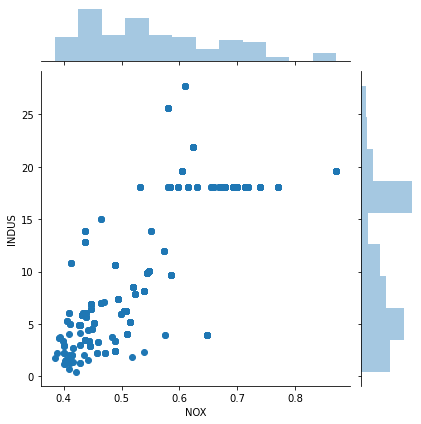

In [13]:
sns.jointplot(bstndf.NOX, bstndf.INDUS)
stats.pearsonr(bstndf.NOX,bstndf.INDUS)

## 5.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

- There are two variables at hand, MEDV and AGE. 
  1. DIS: continuous variable
  2. MEDV : continous variable  
- Aim: To check the impact of an additional weighted distance to the five Boston employment centres on the median value of the owner occupied homes.  
  * In order to do this I define the hypothesis as follow: 
- Hypotheses 
  1. $H_0$: there is no impact of additional weighted distance to the five Boston employment centres on the median value of the owner occupied homes   
  2. $H_1$: there impact of additional weighted distance to the five Boston employment centres on the median value of the owner occupied homes 
- $\alpha$ = 0.05 
- The nature of variables suggests to perform the Pearson Correlation. This will give the correlation coefficient b/w the two variables.  
- Conclusion: 
    * The regression gives a p-value << 0.05 which means that the NULL hypothesis is rejected and there is impact of additional weighted distance to the five Boston employment centres on the median value of the owner occupied homes 



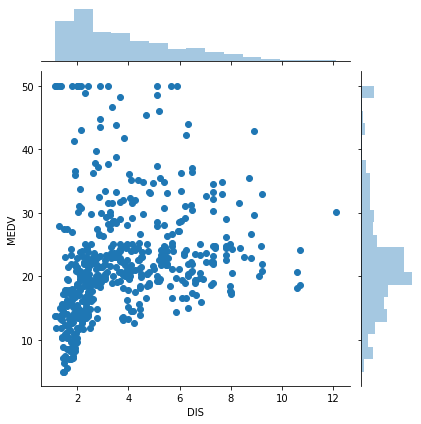

In [14]:
sns.jointplot(bstndf['DIS'],bstndf['MEDV'])

In [15]:
import statsmodels.api as sm
## X is the input variables (or independent variables)
X = bstndf['DIS']
## y is the target/dependent variable
y = bstndf['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        14:04:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""